## Entanglement Entropy of pure states & The page curve

This test shows how to extract the purity $p_2=\mathrm{Tr}(\rho^2)$ and second R\'enyi entropy $S=-\log_2(p_2)$ from randomized measurements [Brydges et al Science 2019](https://doi.org/10.1126/science.aau4963). 

This is illustrated in the context of the Page curve of Haar pure random states: The curve of the entropy $S$ of reduced systems is expected to show a triangular shape as a function of system size.

In [1]:
using RandomMeas
using ProgressMeter

First we load in memory a random quantum state and calculates the purities accross different cuts

In [2]:
N  = 6 #number of qubits
χ = 2^(N÷2) #a large bond-dimension to consider a typical random state
ξ = siteinds("Qubit", N)
ψ = random_mps(ξ; linkdims=χ);

In [3]:
p = zeros(N)
for NA in 1:N
    spec = get_spectrum(ψ,NA)
    p[NA] = get_moment(spec,2)
end
println("purities ", p);

purities [0.7274542184757417, 0.4340004282901079, 0.2482138003193021, 0.31656003416105954, 0.5262205170641374, 1.0]


Then we sample randomized measurements 

In [5]:
NU=100
NM=100
measurement_settings = sample_local_random_unitaries(N,NU,site_indices = ξ);
measurement_data = simulate_local_measurements(ψ,NM,measurement_settings=measurement_settings,mode="dense");

Progress: 100%|█████████████████████████████████████████| Time: 0:00:12


In [12]:
ps = zeros(N)
@showprogress dt=1 for NA in 1:N
        ps[NA] = get_purity_direct(measurement_data, collect(1:NA))
end
println("estimated purities ",ps);

estimated purities [0.7422484848484852, 0.4368363636363636, 0.24876969696969697, 0.29844848484848474, 0.5492121212121217, 1.009969696969697]


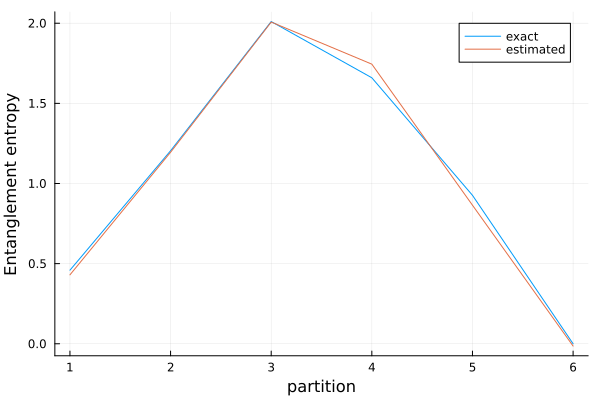

In [13]:
using Plots
Plots.plot(-log2.(p),label="exact")
Plots.plot!(-log2.(ps),label="estimated")
xlabel!("partition")
ylabel!("Entanglement entropy")
#legend()